# Gradient Descent

## 1.  Minimizing a Single Variable Function

Here I use a function $f(x)=x^3-2(x+1)^2$. It's not a convex function, but we can reach the local minimum value of x by properly choose the starting value and learning rate.

In [76]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set Seaborn theme for plots
sns.set_theme()

# Define domain variables for plotting f
domain = np.linspace(-5, 5, 50)

# Define test function for experimenting
def f(w):
    return w**3-2*(w+1)**2

From the graph, we can see the local minimum is around x=2, thus we pick x0 = 3.

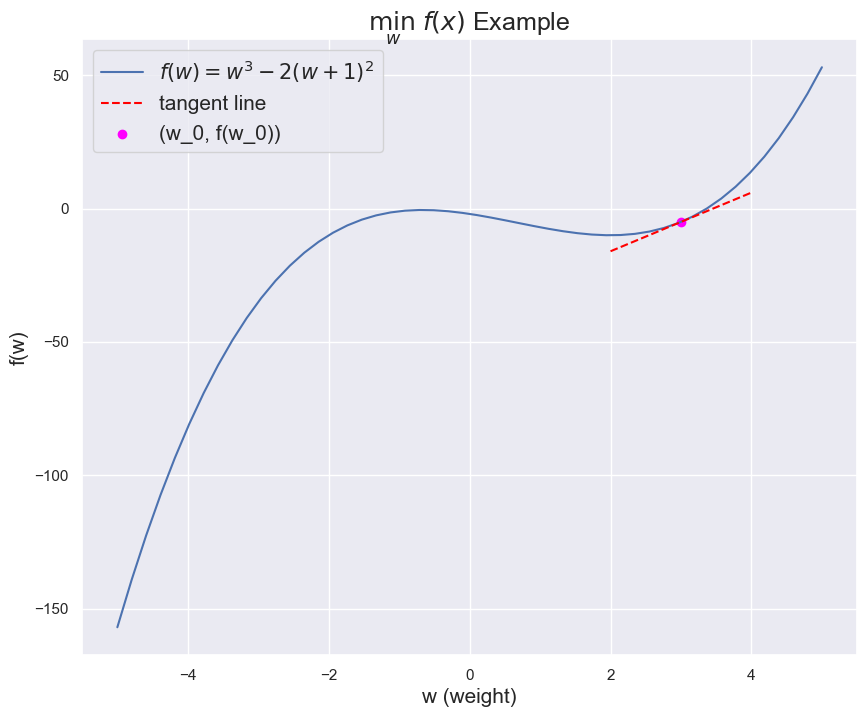

In [77]:
# Define parabola derivative
def df(w): 
    return 3*w**2-4*(w+1)

# Choose w_0
w_0 = 3.0

# Define tangent line function for visualization
def tangent_line(w_i, function, derivative, i = 0, color = "magenta", show = True):
    # Define tangent line
    # y = m*(x - x1) + y1
    def line(w):
        return derivative(w_i)*(w - w_i) + function(w_i)

    wrange = np.linspace(w_i - 1, w_i + 1, 10)
    if show:
        plt.plot(wrange,
            line(wrange), 
            '--', 
            linewidth = 1.5, 
            color = "red", 
            label = "tangent line")
    plt.scatter([w_i], [function(w_i)], color = color, label = f"(w_{i}, f(w_{i}))")

# Plot the figure
plt.figure(figsize = (10, 8))
# Plot the function
plt.plot(domain, f(domain), label = "$f(w) = w^3-2(w+1)^2$")
# Visualize the tangent line
tangent_line(w_0, f, df)

# Label the figure
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("$\min_w$ $f(x)$ Example", fontsize = 18)
plt.show()

## 2. Direction of Descent and the Learning Rate

w_0 = 3.0
w_1 = 0.7999999999999998


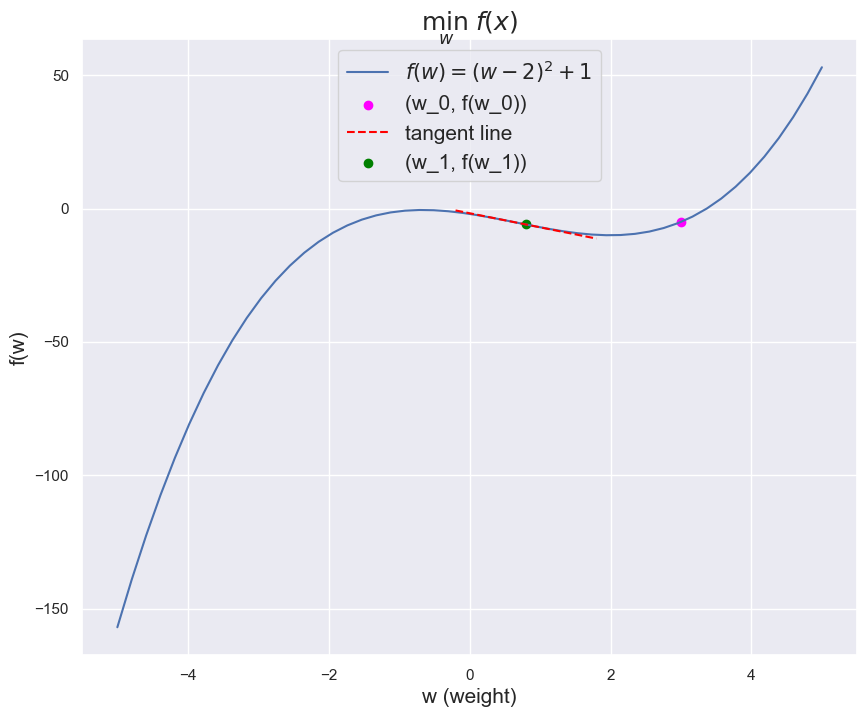

In [78]:
# Set learning rate 
myalpha = .2

# Moving in the opposite direction of the derivative at w_0
w_1 = w_0 - myalpha*df(w_0)

# Print the sequence of w variables
print(f"{w_0 = }")
print(f"{w_1 = }")

# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = (w - 2)^2 + 1$")

# Visualize the tangent lines
tangent_line(w_0, f, df, show = False)
tangent_line(w_1, f, df, i = 1, color = "green")

# Plot labels
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(x)$", fontsize = 18)
plt.show()

## 3. Gradient Descent Function

w_0 = 3.0 | df(w_0) = 11.0
w_1 = 0.8 | df(w_1) = -5.28
w_2 = 1.86 | df(w_2) = -1.089792000000001
w_3 = 2.07 | df(w_3) = 0.6080767347916787
w_4 = 1.95 | df(w_4) = -0.3744420218865159
w_5 = 2.03 | df(w_5) = 0.22007631617122492
w_6 = 1.98 | df(w_6) = -0.13342535810928347
w_7 = 2.01 | df(w_7) = 0.0795042316463519
w_8 = 1.99 | df(w_8) = -0.04788865928218655
w_9 = 2.0 | df(w_9) = 0.028663620170870985
w_10 = 2.0 | df(w_10) = -0.017222655052860247
w_11 = 2.0 | df(w_11) = 0.010324658458475966
w_12 = 2.0 | df(w_12) = -0.006197985301183095
w_13 = 2.0 | df(w_13) = 0.0037176370549740767
w_14 = 2.0 | df(w_14) = -0.002230996496598081
w_15 = 2.0 | df(w_15) = 0.001338448499502931
w_16 = 2.0 | df(w_16) = -0.0008031228261753398



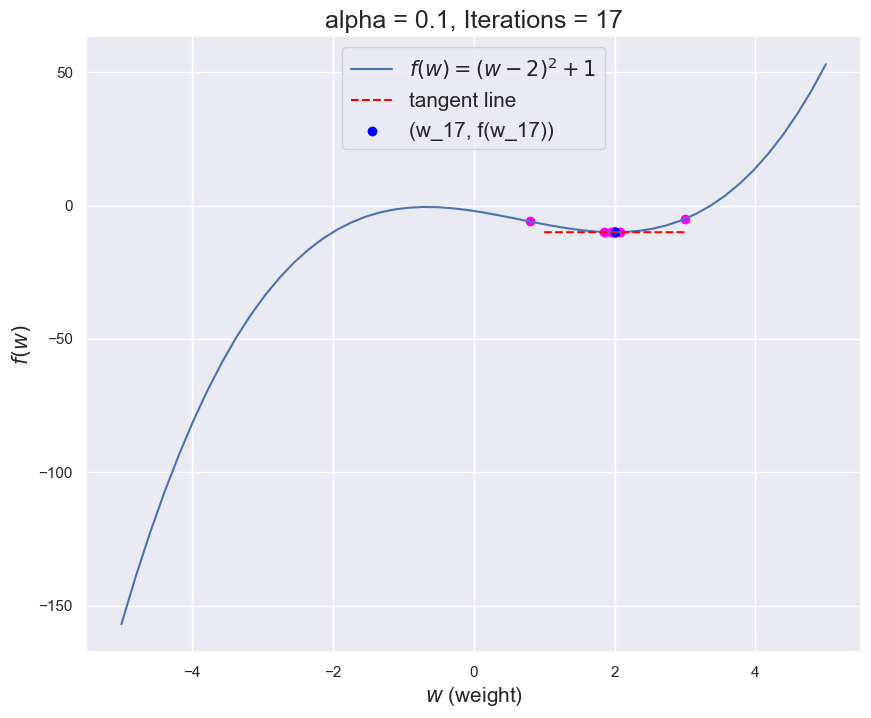

In [79]:
def derivative_descent(derivative, alpha = myalpha, myw_0 = w_0, max_iter = 1_000):
    W = [myw_0]
    i = 0
    while abs(derivative(W[-1])) > 0.001 and i < max_iter:
        w_new = W[-1] - alpha*df(W[-1])
        W.append(w_new)
        i += 1
    W = np.array(W)

    return W

W = derivative_descent(df)

for i, w in enumerate(W):
    print(f"w_{i} = {np.round(w, decimals = 2)} | df(w_{i}) = {df(w)}")
print("")


# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = (w - 2)^2 + 1$")
plt.scatter(W, f(W), color = "magenta")
tangent_line(W[-1], f, df, i = len(W), color = "blue")
plt.xlabel("$w$ (weight)", fontsize = 15)
plt.ylabel("$f(w)$", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title(f"alpha = {alpha}, Iterations = {len(W)}", fontsize = 18)
plt.show()


## 4. Comparison of Different Learning Rate

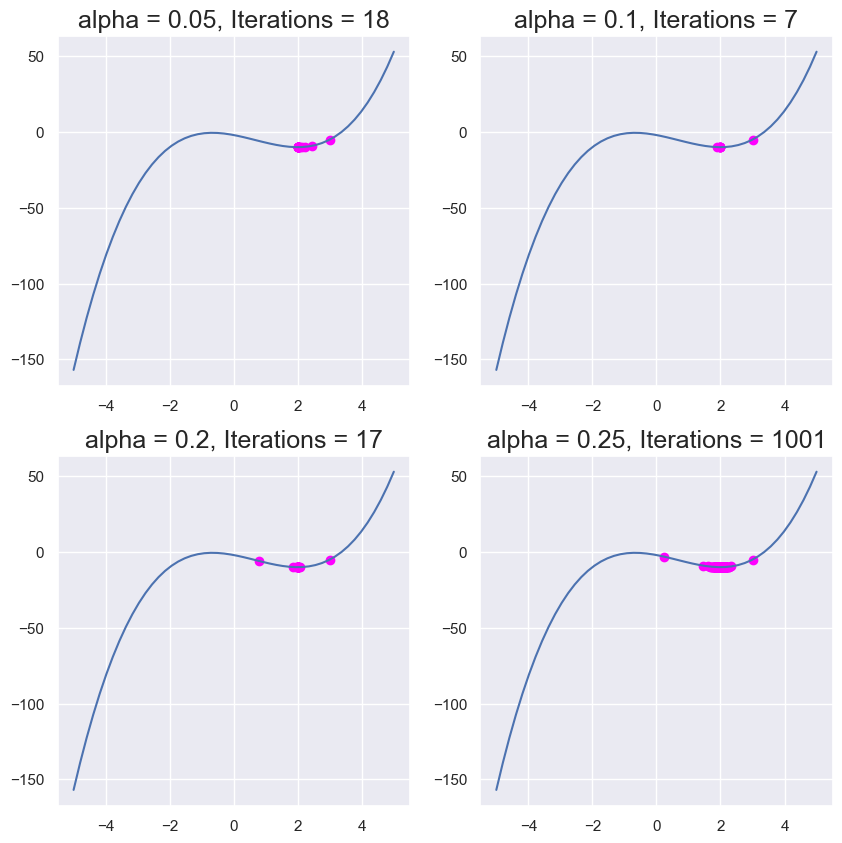

In [83]:
# Possible choices of learning rate 
alphas = [0.05, 0.1, 0.2,0.25]

# Call the subplots method for plotting a grid of figures
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Loop over the axs and alpha values
for ax, alpha in zip(axs.flat, alphas):
    W = derivative_descent(df, alpha = alpha)
    ax.plot(domain, f(domain))
    ax.scatter(W, f(W), color = "magenta")
    ax.set_title(f"alpha = {alpha}, Iterations = {len(W)}", fontsize = 18)

## 5. Minimizing Several Variables Function

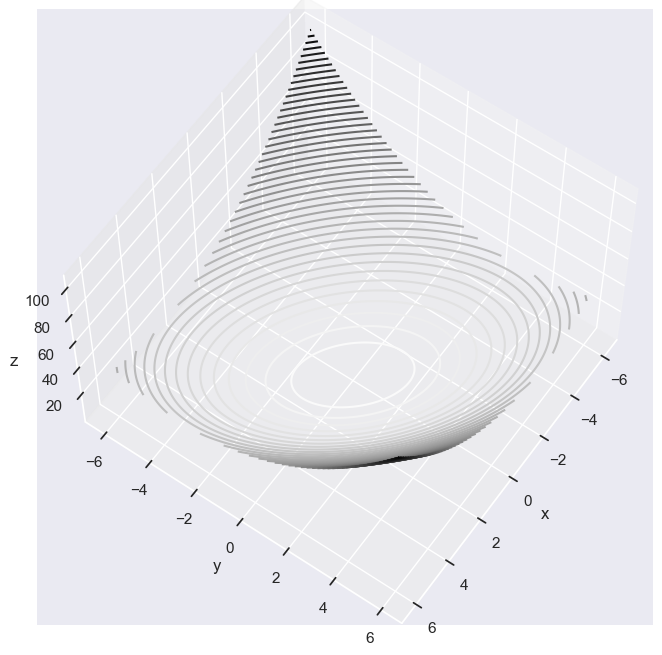

In [85]:
from mpl_toolkits import mplot3d

def f(w_0, w_1):
    return w_0 ** 2 + w_1 ** 2 + w_0*w_1

x = np.linspace(-6, 6, 300)
y = np.linspace(-6, 6, 300)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(60, 35)

plt.show()

## 6. Gradient Descent Function for Multiple Variables

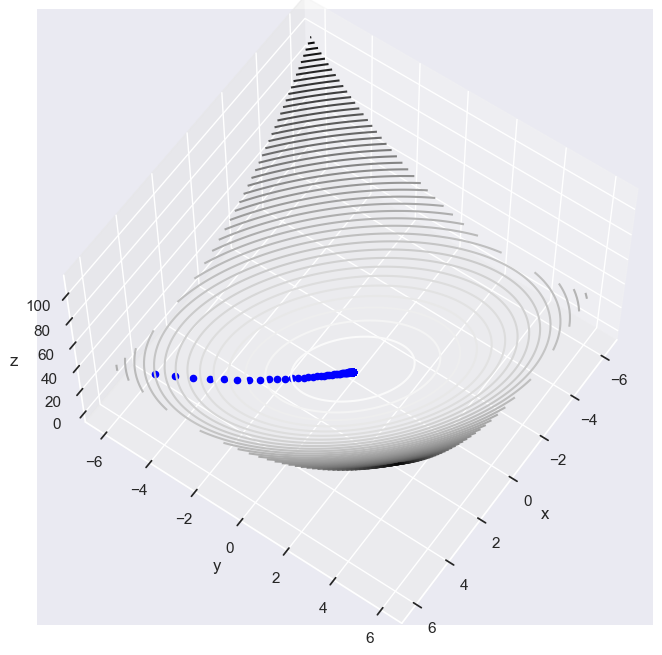

In [88]:
def df(w):
    grad = [2*w[0]+w[1], 2*w[1]+w[0]]
    return np.array(grad)

def gradient_descent(derivative, W, alpha, max_iter):
    i = 0
    W_hist = [W]
    while i < max_iter:
        W = W - alpha*df(W)
        i += 1
        W_hist.append(W)

    return W_hist

W = gradient_descent(df, np.array([5.0, -5.0]), 0.1, 500)

x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)


fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
for i in range(len(W)):
    ax.scatter3D([W[i][0]], 
                 [W[i][1]], 
                 [f(W[i][0], W[i][1])], color = "blue")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(60, 35)
plt.show()